<a href="https://colab.research.google.com/github/tanyakuznetsova/US-highschool-Insights/blob/main/US_and_Californian_high_school_performance_and_socioeconomic_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I will explore and analyze US public high school performance across the states, focusing in particular on high schools in the state of California. This comprenensive study uses publically available high school performance and census data, and reveal insights and trends across the states. It encompasses both the educational outcomes for high school students in specific areas, as well as broader socioeconomic indicators.

While mainly using python and pandas, I used it in combination with SQL for querying and retrieving data from databases. Furthermore, GeoPandas is a great library for working with geospatial data, which I used for visualizing the findings for California.

In [152]:
from google.colab import drive
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
import geopandas as gpd

In [153]:
drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/My Drive/census_data.csv')
df2 = pd.read_csv('/content/drive/My Drive/public_hs_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
conn = sqlite3.connect('census_data.db')
df1.to_sql('census_data', conn, index = False, if_exists = 'replace')
df2.to_sql('public_hs_data', conn, index = False, if_exists = 'replace')


16623

In [155]:
sql_query = '''SELECT * FROM census_data LIMIT 5'''

In [156]:
pd.read_sql_query(sql_query, conn)

,zip_code,state_code,pop_total,median_household_income,pct_edu_hs,pct_edu_somecollege_under1yr,pct_edu_somecollege_1plusyrs,pct_edu_attain_assoc,pct_edu_attain_bach,pct_edu_attain_master,pct_edu_attain_prof,pct_edu_attain_doct,pct_white,pct_black,pct_asian,pct_hispanic,pct_amerindian,pct_nativehawaii,pct_tworaces,pct_otherrace
0,601,PR,17800,11507.0,24.1861,1.2198,12.9974,5.0812,15.5212,2.3387,0.2271,0.5973,0.1573,0.0000,0.0000,99.7978,0.0449,0.0000,0.0000,0.0000
1,602,PR,39716,15511.0,18.3838,1.0237,8.3569,13.3921,13.9403,4.5524,0.7551,0.9947,3.8448,0.0554,0.1486,93.4560,0.0000,0.0000,2.4172,0.0781
2,603,PR,51565,16681.0,23.6281,1.6381,10.2082,8.1205,16.3225,4.8049,0.8177,0.6687,1.2508,0.3607,0.3704,96.8254,0.0000,0.0213,0.9367,0.2347
3,606,PR,6320,11648.0,32.7551,0.7076,4.0402,4.7021,7.9662,1.1185,0.3424,0.2967,0.1741,0.0000,0.0000,99.8259,0.0000,0.0000,0.0000,0.0000
4,610,PR,27976,17751.0,28.7571,1.3412,9.2270,8.4109,12.3096,2.4640,0.0624,0.7278,1.4691,0.0536,0.0000,97.9196,0.0000,0.0036,0.4432,0.1108


In [157]:
sql_query = """
SELECT * FROM public_hs_data
WHERE school_name LIKE '%GARDEN CITY%'
AND state_code = 'NY'
LIMIT 5
"""

In [158]:
pd.read_sql_query(sql_query, conn)

,school_id,school_name,street_address,city,state_code,zip_code,locale_code,pct_proficient_math,pct_proficient_reading,pct_white,pct_black,pct_asian,pct_hispanic,pct_amerindian,pct_nativehawaii,pct_tworaces
0,361176000942,GARDEN CITY HIGH SCHOOL,170 ROCKAWAY AVE,GARDEN CITY,NY,11530,21.0,99.501661,99.501661,92.8391,0.5897,3.8753,2.6959,0.0,0.0,0.0


# How many high schools are there in each zip code? In every state?

In [159]:
sql_query = '''
SELECT COUNT(school_id) AS num_schools
FROM public_hs_data
GROUP BY zip_code'''
schools_by_zip = pd.read_sql_query(sql_query, conn)

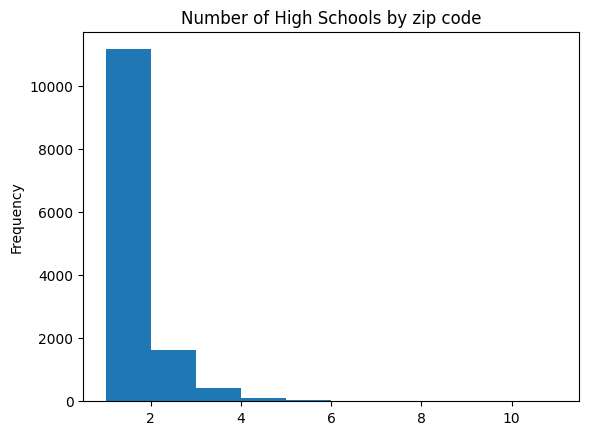

In [160]:
schools_by_zip['num_schools'].plot(kind ='hist',
                          bins=10,
                          title='Number of High Schools by zip code')
plt.show()

The vast majority of zip codes have one public high school, and having more than two high schools is rare.

How many high schools are there in every state?

In [161]:
sql_query = '''
SELECT state_code, COUNT(school_id) AS num_schools
FROM public_hs_data
GROUP BY state_code
ORDER BY num_schools DESC'''
pd.read_sql_query(sql_query, conn)

,state_code,num_schools
0,CA,1294
1,TX,1199
2,NY,933
3,OH,770
4,IL,704
5,MI,597
6,PA,592
7,FL,493
8,MO,487
9,NC,477


The states with most high schools are California, Texas, and New York, all highly populated states so that makes perfect sense. States with the lowest number of high schools are Guam and Virgin Islands. Additionally, we have a separate designation for Tribal/Indigenous schools that are associated with the Bureau of Indian Affairs (BI).

# Urbanization: are most high schools located in cities, towns, or rural ares?

In [162]:
sql_query = """
SELECT *,
CASE
WHEN locale_code IN(11.0, 12.0, 13.0) THEN 'City'
WHEN locale_code IN(21.0, 22.00, 23.0) THEN 'Suburb'
WHEN locale_code IN(31.0, 32.00, 33.0) THEN 'Town'
WHEN locale_code IN(41.0, 42.00, 43.0) THEN 'Rural'
END AS locale_text
FROM public_hs_data
"""
urbanization = pd.read_sql_query(sql_query, conn)

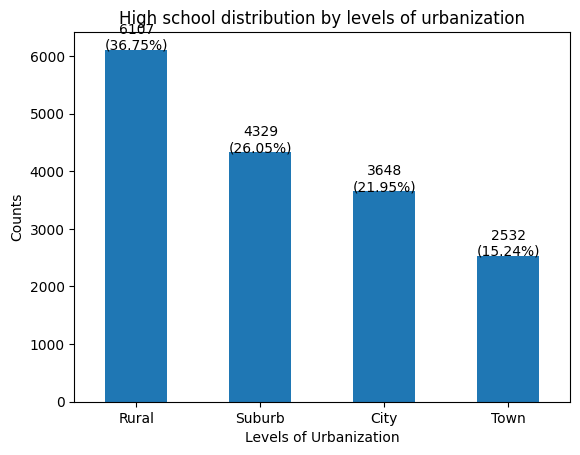

In [163]:
counts = urbanization['locale_text'].value_counts()
total_counts = sum(counts)#.sum()
percentages = counts/total_counts * 100.00

ax = counts.plot(kind='bar', title='High school distribution by levels of urbanization')

#annotations
for i, count in enumerate(counts):
    plt.text(i, count + 1, f'{count}\n({percentages[i]:.2f}%)', ha='center')

plt.xlabel('Levels of Urbanization')
plt.ylabel('Counts')
plt.xticks(rotation=0)

plt.show()

Most public high schools are rural or suburban. Now it would also be interesting to have a look at how students performance varies with the level of median household income in the area.

# Levels of income and performance at school

First of all, what are the minimum, maximum, and average household income across the United States?

In [164]:
sql_query = """
SELECT
MIN(median_household_income) AS min_household_income,
MAX(median_household_income) AS max_household_income,
ROUND(AVG(median_household_income), 2) AS avg_household_income
FROM census_data
"""
pd.read_sql_query(sql_query, conn)

,min_household_income,max_household_income,avg_household_income
0,2499.0,250001.0,54683.12


And on the state level:

In [165]:
sql_query = """
SELECT
state_code,
MIN(median_household_income) AS min_household_income,
MAX(median_household_income) AS max_household_income,
ROUND(AVG(median_household_income), 2) AS avg_household_income
FROM census_data
GROUP BY state_code
"""
pd.read_sql_query(sql_query, conn)

,state_code,min_household_income,max_household_income,avg_household_income
0,AK,16667.0,170329.0,52698.25
1,AL,2499.0,203083.0,42463.27
2,AR,14479.0,99205.0,39647.68
3,AZ,11384.0,129564.0,48602.52
4,CA,2499.0,250001.0,65724.77
5,CO,13750.0,194750.0,58976.20
6,CT,11755.0,218152.0,84020.73
7,DC,30665.0,165425.0,81712.13
8,DE,26810.0,140400.0,62800.41
9,FL,2499.0,232500.0,50791.42



## Which states have an median household income above the national average?
Let's find them and arrange from richest to (relatively) less rich:

In [166]:
sql_query = """
SELECT *
FROM
(SELECT
state_code,
MIN(median_household_income) AS min_household_income,
MAX(median_household_income) AS max_household_income,
ROUND(AVG(median_household_income), 2) AS avg_household_income
FROM census_data
GROUP BY state_code) AS temp
WHERE temp.avg_household_income > (SELECT
ROUND(AVG(median_household_income), 2)
FROM census_data)
ORDER BY avg_household_income DESC;
"""
pd.read_sql_query(sql_query, conn)

,state_code,min_household_income,max_household_income,avg_household_income
0,NJ,15855.0,250001.0,87140.49
1,CT,11755.0,218152.0,84020.73
2,MD,20341.0,250001.0,81827.66
3,DC,30665.0,165425.0,81712.13
4,MA,2499.0,191744.0,78934.98
5,RI,28901.0,230052.0,72048.03
6,NH,21802.0,175714.0,69985.63
7,CA,2499.0,250001.0,65724.77
8,NY,12454.0,250001.0,65674.66
9,HI,26719.0,121307.0,63464.97


New Jersey tops the list of affluent states, followed by Connecticut, Maryland, and District of Columbia.
As a side note, California seems to be an outlier in terms of the minumum household income!

# Does the degree of wealth of an area influence kids' performance at school?
Do the characteristics of a zip code, such as the median income in the area, affect how well students tend to perform in exams?

In [167]:
sql_query = """
SELECT
AVG(pct_proficient_math) AS avg_math_proficiency_pct,
AVG(pct_proficient_reading) AS avg_reading_proficiency_pct,
CASE
WHEN median_household_income < 54683.12 THEN 'below national avg'
WHEN median_household_income BETWEEN 54683.13 AND 75000.00 THEN 'above national avg'
WHEN median_household_income > 75000.00 THEN 'highly affluent'
END AS degree_of_wealth
FROM public_hs_data
LEFT JOIN census_data
ON census_data.zip_code = public_hs_data.zip_code
WHERE median_household_income IS NOT NULL
GROUP BY degree_of_wealth
ORDER BY avg_math_proficiency_pct DESC, avg_reading_proficiency_pct DESC;
"""

pd.read_sql_query(sql_query, conn)

,avg_math_proficiency_pct,avg_reading_proficiency_pct,degree_of_wealth
0,60.045772,71.427673,highly affluent
1,51.288604,63.056980,above national avg
2,45.039889,56.448719,below national avg


Unsurprisingly, the answer is yes - there is a definitely a correlation between how affluent an area is and how well students tend to do academically.

# Better at math or reading?

Do students do better at math or reading on average? In how many states are average math exams higher than reading and vice versa?

In [168]:
sql_query = """
SELECT
COUNT(*) FILTER (WHERE state_math_proficiency > state_reading_proficiency) as better_at_math,
COUNT(*) FILTER (WHERE state_reading_proficiency > state_math_proficiency) as better_at_reading
FROM
(SELECT state_code,
ROUND(AVG(pct_proficient_math), 2) AS state_math_proficiency,
ROUND(AVG(pct_proficient_reading), 2) AS state_reading_proficiency
FROM public_hs_data
WHERE pct_proficient_math IS NOT NULL
AND pct_proficient_reading IS NOT NULL
GROUP BY state_code) AS temp
;
"""
pd.read_sql_query(sql_query, conn)

,better_at_math,better_at_reading
0,7,45


Students do better at math at only a handful of states and reading exam scores are higher than math exam score in most states. What states are those?

In [169]:
# states with stronger math exam performance

sql_query = """
SELECT
*
FROM
(SELECT state_code,
ROUND(AVG(pct_proficient_math), 2) AS state_math_proficiency,
ROUND(AVG(pct_proficient_reading), 2) AS state_reading_proficiency
FROM public_hs_data
WHERE pct_proficient_math IS NOT NULL
AND pct_proficient_reading IS NOT NULL
GROUP BY state_code
ORDER BY state_math_proficiency DESC) AS temp
WHERE state_math_proficiency > state_reading_proficiency
;
"""
pd.read_sql_query(sql_query, conn)

,state_code,state_math_proficiency,state_reading_proficiency
0,MD,85.16,81.24
1,IA,85.04,81.03
2,SC,84.61,76.91
3,IN,82.76,78.97
4,TX,74.43,70.08
5,TN,64.06,61.23
6,WY,38.54,31.86


In [170]:
# states with stronger reading exam performance

sql_query = """
SELECT
*
FROM
(SELECT state_code,
ROUND(AVG(pct_proficient_math), 2) AS state_math_proficiency,
ROUND(AVG(pct_proficient_reading), 2) AS state_reading_proficiency
FROM public_hs_data
WHERE pct_proficient_math IS NOT NULL
AND pct_proficient_reading IS NOT NULL
GROUP BY state_code
ORDER BY state_reading_proficiency DESC) AS temp
WHERE state_reading_proficiency > state_math_proficiency
;
"""
pd.read_sql_query(sql_query, conn)

,state_code,state_math_proficiency,state_reading_proficiency
0,NY,91.14,91.66
1,MA,77.25,90.11
2,VA,78.87,88.58
3,OH,81.33,85.62
4,OK,70.61,77.29
5,NE,65.50,72.49
6,PA,64.17,72.19
7,MO,53.37,71.56
8,LA,53.52,68.13
9,OR,29.00,67.75


New York appears to be doing very well overall with excellent average exam scores in both math and reading; meanwhile, on the other end of the spectrum, DC public high schools are performing exceptionally badly. This is particularly glaring in contrast with one of the highest average incomes in the country in the District. Are there more states like this?
# What are wealthy states with poor school performance?

In [171]:
# rich states with poor performing schools

sql_query = """
SELECT * FROM
(SELECT census_data.state_code,
ROUND(AVG(pct_proficient_math), 2) AS math_scores,
ROUND(AVG(pct_proficient_reading), 2) AS reading_scores,
ROUND(AVG(median_household_income), 2) AS avg_income
FROM census_data
LEFT JOIN public_hs_data
ON census_data.zip_code = public_hs_data.zip_code
GROUP BY census_data.state_code
HAVING AVG(median_household_income) IS NOT NULL
ORDER BY avg_income DESC, math_scores ASC, reading_scores ASC) AS temp
WHERE temp.avg_income > (SELECT AVG(median_household_income) FROM census_data)
AND (temp.math_scores < (SELECT AVG(pct_proficient_math) FROM public_hs_data)
OR temp.reading_scores < (SELECT AVG(pct_proficient_reading) FROM public_hs_data));
"""
pd.read_sql_query(sql_query, conn)

,state_code,math_scores,reading_scores,avg_income
0,NJ,18.78,37.46,84951.68
1,CT,30.78,52.21,81453.56
2,DC,9.28,24.68,75898.31
3,NH,35.83,58.25,69587.81
4,RI,15.28,32.77,68910.48
5,DE,21.54,46.27,64670.14
6,CA,29.32,55.98,64424.77
7,HI,27.22,50.47,63639.41
8,ND,33.66,52.12,61021.36
9,CO,22.96,37.87,59871.73


# Less wealthy states with good schools?
We can see if there are states bucking the trend that wealth equals doing better academically:

In [172]:
# below national average income states with well performing schools

sql_query = """
SELECT * FROM
(SELECT census_data.state_code,
ROUND(AVG(pct_proficient_math), 2) AS math_scores,
ROUND(AVG(pct_proficient_reading), 2) AS reading_scores,
ROUND(AVG(median_household_income), 2) AS avg_income
FROM census_data
LEFT JOIN public_hs_data
ON census_data.zip_code = public_hs_data.zip_code
GROUP BY census_data.state_code
HAVING AVG(median_household_income) IS NOT NULL
ORDER BY  math_scores DESC, reading_scores DESC, avg_income ASC) AS temp
WHERE temp.avg_income < (SELECT AVG(median_household_income) FROM census_data)
AND (temp.math_scores > (SELECT AVG(pct_proficient_math) FROM public_hs_data)
OR temp.reading_scores > (SELECT AVG(pct_proficient_reading) FROM public_hs_data));
"""
pd.read_sql_query(sql_query, conn)

,state_code,math_scores,reading_scores,avg_income
0,SC,84.53,76.71,43278.71
1,IN,82.76,78.97,51790.43
2,OH,81.36,85.62,50931.41
3,TX,74.40,70.13,53774.22
4,OK,70.75,77.26,45774.73
5,NE,65.62,72.59,54668.19
6,TN,63.71,61.39,44219.49
7,MO,53.41,71.61,47046.93
8,LA,53.16,67.80,44196.95
9,OR,28.83,67.36,49945.38


It looks like public high schools in South Carolina, Indiana and Ohio are doing something right!

So we can see that even though there is a general trend that high school students in wealthier areas tend to do better academically, it's not a universal rule and there is a lot of nuance.

# High School Ranking:
## What are three best high school in every state?

Finally, let's rank the public high schools

In [173]:
pd.set_option('display.max_rows', 200)

sql_query = """
SELECT * FROM
(SELECT
school_id, school_name, street_address, city, state_code, pct_proficient_math, pct_proficient_reading,
DENSE_RANK() OVER(PARTITION BY state_code ORDER BY pct_proficient_math DESC, pct_proficient_reading DESC) AS rank
FROM public_hs_data
WHERE pct_proficient_math IS NOT NULL
AND pct_proficient_reading IS NOT NULL) AS temp
WHERE temp.rank <= 3
ORDER BY state_code, pct_proficient_math DESC, pct_proficient_reading DESC;
"""

pd.read_sql_query(sql_query, conn)

,school_id,school_name,street_address,city,state_code,pct_proficient_math,pct_proficient_reading,rank
0,20018000115,Steller Secondary School,2508 Blueberry Lane,Anchorage,AK,47.000001,66.999999,1
1,20072000661,Unalaska Jr/Sr High School,55 East Broadway,Unalaska,AK,44.499999,44.499999,2
2,20066000570,Petersburg High School,109 Charles W Street,Petersburg,AK,42.000000,36.999999,3
3,10243001417,Loveless Academic Magnet Prog High Sch,921 West Jeff Davis,Montgomery,AL,92.000000,97.495869,1
4,10249001056,Mt Brook High Sch,3650 Bethune Dr,Mountain Brook,AL,83.000003,94.999998,2
5,10343001304,Vestavia Hills High Sch,2235 Lime Rock Rd,Vestavia Hills,AL,63.000000,88.000000,3
6,50007801078,HAAS HALL ACADEMY,3155 N COLLEGE AVE STE 108,FAYETTEVILLE,AR,97.495144,97.500002,1
7,50948000693,MARSHALL HIGH SCHOOL,950 HWY 65 N,MARSHALL,AR,57.000000,57.000000,2
8,50960000702,MCCRORY HIGH SCHOOL,509 N JACKSON ST,MCCRORY,AR,54.488373,32.000000,3
9,40880001441,University High School,421 N. Arcadia Blvd.,Tucson,AZ,97.500003,97.499999,1


# A closer look at California highschools by zip code

Let's drill down to the zip code level. The following calculates the average math and reading exam scores for public high schools in California and compares them to the state average.

In [174]:
sql_query = """
SELECT
p.zip_code,
ROUND(AVG(p.pct_proficient_math), 2) AS math_scores,
ROUND(AVG(p.pct_proficient_reading), 2) AS reading_scores,
s.avg_math_state,
s.avg_reading_state,
ROUND(AVG(p.pct_proficient_math) - s.avg_math_state, 2) AS math_score_difference,
ROUND(AVG(p.pct_proficient_reading) - s.avg_reading_state, 2) AS reading_score_difference
FROM public_hs_data AS p
INNER JOIN (
  SELECT state_code,
  ROUND(AVG(pct_proficient_math), 2) AS avg_math_state,
  ROUND(AVG(pct_proficient_reading), 2) AS avg_reading_state
  FROM public_hs_data
  GROUP BY state_code) AS s
  ON p.state_code = s.state_code
WHERE p.state_code = 'CA'
GROUP BY
p.zip_code,
s.avg_math_state,
s.avg_reading_state;
"""

ca_schools_performance_diff_by_zip = pd.read_sql_query(sql_query, conn)

In [175]:
ca_schools_performance_diff_by_zip

,zip_code,math_scores,reading_scores,avg_math_state,avg_reading_state,math_score_difference,reading_score_difference
0,90001,16.10,55.00,29.37,56.02,-13.27,-1.02
1,90002,7.25,22.00,29.37,56.02,-22.12,-34.02
2,90003,14.17,35.33,29.37,56.02,-15.20,-20.69
3,90004,22.00,67.00,29.37,56.02,-7.37,10.98
4,90005,14.50,54.50,29.37,56.02,-14.87,-1.52
...,...,...,...,...,...,...,...
870,96145,42.00,62.00,29.37,56.02,12.63,5.98
871,96146,75.00,75.00,29.37,56.02,45.63,18.98
872,96150,17.00,42.00,29.37,56.02,-12.37,-14.02
873,96161,52.00,62.00,29.37,56.02,22.63,5.98


To create geospatial visualizations, we need to import shapefile data containing geographical information such as zip code boundaries. I located such publicly available data here: https://gis.data.ca.gov/datasets/CDEGIS::california-zip-codes/about

In [177]:
california_zip_codes = gpd.read_file('/content/drive/My Drive/CA_Zip_Codes')

In [178]:
california_zip_codes.head()

,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,geometry
0,00012,Mt Meadows Area,CA,-99,-99.0,30.92,"POLYGON ((-235397.856 9938636.426, -235571.593..."
1,00016,Sequoia National Forest,CA,-99,-99.0,39.33,"POLYGON ((463415.330 8230735.164, 450342.706 8..."
2,00017,Northeast Fresno County,CA,-99,-99.0,564.38,"POLYGON ((354976.178 8923823.768, 354863.088 8..."
3,00018,Los Padres Ntl Forest,CA,-99,-99.0,90.83,"POLYGON ((355769.015 7866496.399, 348656.291 7..."
4,00019,Lassen Ntl Forest,CA,-99,-99.0,412.59,"POLYGON ((384.567 10127749.312, 294.796 101278..."


The first 32 rows are areas with negative human population that correspond to national parks and wild areas. They aren't useful but necessary for the map completeness.

I will merge my dataframe with school performance with the geospatial files, but let's ensure the zip code columns on which they will be joined match in datatype.

In [179]:
california_zip_codes.dtypes['ZIP_CODE']

dtype('O')

We need to cast it as integer type, same as in the school performance dataframe.

In [180]:
california_zip_codes['ZIP_CODE'] = california_zip_codes['ZIP_CODE'].astype('int64')

In [181]:
#making sure that the columns match

print(california_zip_codes.dtypes['ZIP_CODE'])
print(ca_schools_performance_diff_by_zip.dtypes['zip_code'])

int64
int64


In [182]:
merged_data = california_zip_codes.merge(
 ca_schools_performance_diff_by_zip,
 how = 'left', #left join to keep all the zip codes even if they don't have high school data
 left_on = 'ZIP_CODE', right_on = 'zip_code')

We now have a combined file with the geometry outlining the zipcode boundaries and highschool performance!

In [183]:
print(type(merged_data))
merged_data.head(3)

<class 'geopandas.geodataframe.GeoDataFrame'>


,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,geometry,zip_code,math_scores,reading_scores,avg_math_state,avg_reading_state,math_score_difference,reading_score_difference
0,12,Mt Meadows Area,CA,-99,-99.0,30.92,"POLYGON ((-235397.856 9938636.426, -235571.593...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,Sequoia National Forest,CA,-99,-99.0,39.33,"POLYGON ((463415.330 8230735.164, 450342.706 8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,Northeast Fresno County,CA,-99,-99.0,564.38,"POLYGON ((354976.178 8923823.768, 354863.088 8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


# California Math and Reading Exam Scores Difference From State Average

Finally, I'd like to do a visualization that displays the difference in math and reading exam scores for California zip codes compared to the state average.

## Math Exam Scores Difference

The left subplot shows the difference in math exam scores for each zip code compared to the state average. Zip codes with positive differences indicate higher scores than the state average, while negative differences indicate lower scores.

Color is used to represent the magnitude of the difference, ranging from cool (lower scores) to warm (higher scores).

## Reading Exam Scores Difference

The right subplot displays the difference in reading exam scores for each zip code compared to the state average. Similar to the math scores subplot, positive differences indicate higher scores than the state average, and negative differences indicate lower scores. Again, color represents the magnitude of the difference.

Each subplot provides insights into the variation of math and reading exam scores across different zip codes in California and how they deviate from the state average.


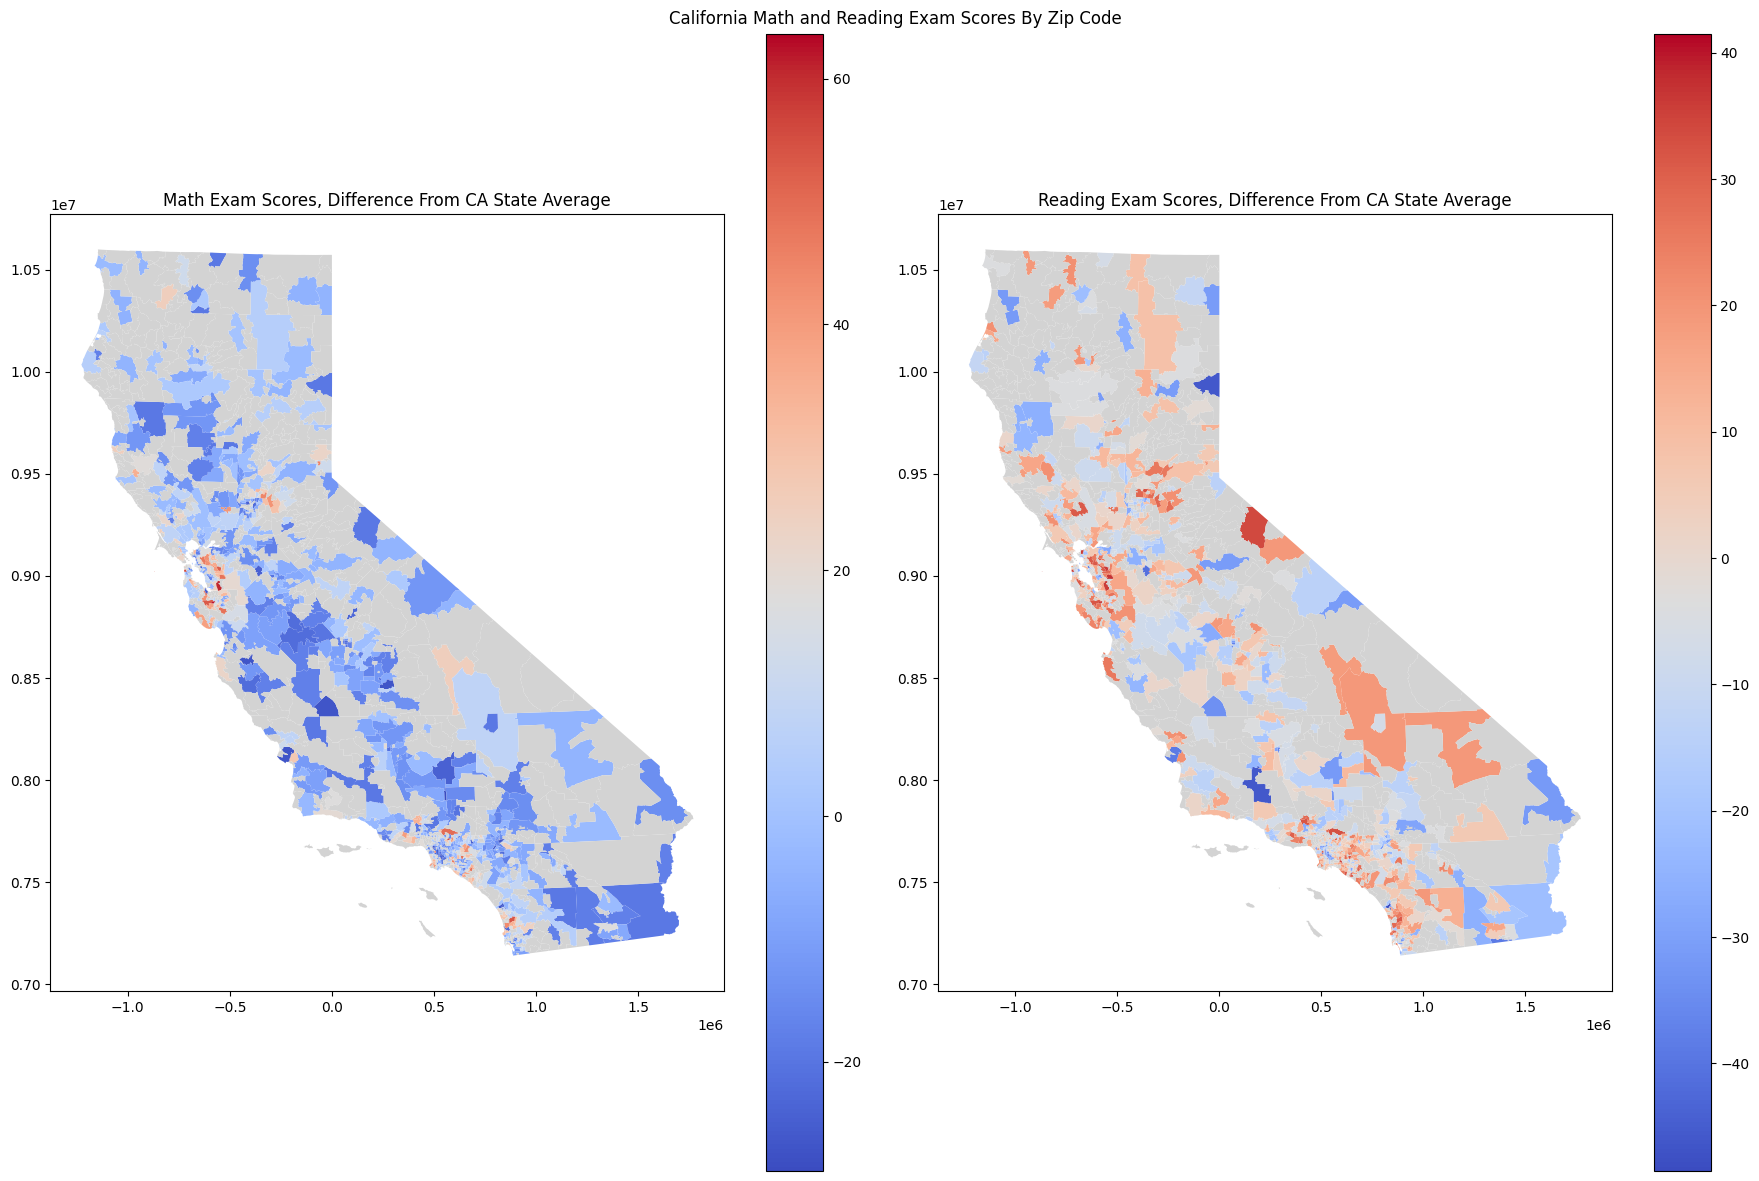

In [185]:
fig, (ax1, ax2) = plt.subplots(1, 2,
                         figsize=(18, 12))

merged_data.plot(column = 'math_score_difference',
                 cmap = 'coolwarm',
                 legend = True,
                 ax = ax1,
                 missing_kwds = {'color': 'lightgrey'})

ax1.set_title('Math Exam Scores, Difference From CA State Average')


merged_data.plot(column = 'reading_score_difference',
         cmap = 'coolwarm',
         legend = True,
                 ax = ax2,
         missing_kwds = {'color': 'lightgrey'})

ax2.set_title('Reading Exam Scores, Difference From CA State Average')


plt.suptitle('California Math and Reading Exam Scores By Zip Code', fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/CA_hs_by_zip.png')
plt.show()

We can see that the best performing schools are concentrated around major cities like San Francisco, Los Angeles, and San Diego; alongside with areas like Coleville, and Lone Pine excelling in reading exams.

In [ ]:
 conn.close()